In [2]:
import numpy as np
import collections
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']='Microsoft YaHei'
#plt.rcParams['font.sans-serif']='SimHei'

In [3]:
filename = "../data/emis_ratio.txt"

pops = ["CO","NOX","CO2","CH4","SO2",
        "N2O","SF6","NMVOC","SO4","PM2.5",
        "PM10","BC","OC","NH3"]
sop  = ["AGRICULTURE","ENERGY","INDUSTRY","RESIDENTIAL","TRANSPORT"]
sop_ch = ["农业","能源","工业","居民","运输"]
cmonth = {1:"January",2:"February",3:"March",4:"April",5:"May",
          6:"June",7:"July",8:"August",9:"September",10:"October",
          11:"November",12:"December"}

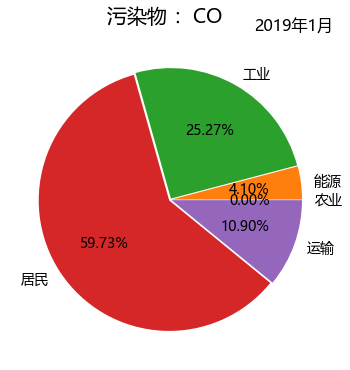

In [5]:
with open(filename, "r") as fili:
    str_lines = fili.readlines()
fili.close()

info = collections.OrderedDict()
for irec,str_line in enumerate(str_lines):
    tmpip = str_line.find(" =================  month =")
    # print(tmpip)
    if tmpip != -1:
        month  = int(str_line[29:].strip())
        # print(cmonth[month])
        for ipie in np.arange(0, 14):
            list_tmp = [float(i) for i in str_lines[irec+2+ipie][20:].split()]
            if ipie == 0:
                info[month] = {pops[ipie]:list_tmp}
            else:
                info[month].update({pops[ipie]:list_tmp})

for imonth in np.arange(1,2):
    for ipops in pops[0:1]:
        plt.figure(figsize=(6,6))
        explode = [0.01,0.01,0.01,0.01,0.01]
        values  = info[imonth][ipops]

        # method 1:
        plt.pie(values,explode=explode,labels=sop_ch,autopct='%1.2f%%',textprops={'fontsize': 14}) #绘制饼图
        plt.suptitle(f"污染物 ：{ipops}", fontsize=20,y=0.95) #绘制标题
        plt.title(f"2019年{imonth}月", loc="right", fontsize=16)